<a href="https://colab.research.google.com/github/PYH1107/generative_ai/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

1. 繪製蝴蝶曲線(butterfly curve)
2. 分為 part 1 跟 part2。
  1.   part 1 符合作業規範（使用 numpy, matplotlib, pandas）
  2.   part 2 是我偏題但捨不得刪 （使用 desmos desktop）



## part 1:
1. 使用 numpy matplotlib pandas
2. butterfly curve with polar coordinate: $$r(\theta) = e^{\sin(\theta)} - 2\cos(4\theta) + \sin^5\left(\frac{2\theta - \pi}{24}\right)$$
3. $\theta$ 的範圍： $$0 \leq \theta \leq 12 \pi$$
4. result figure as below:

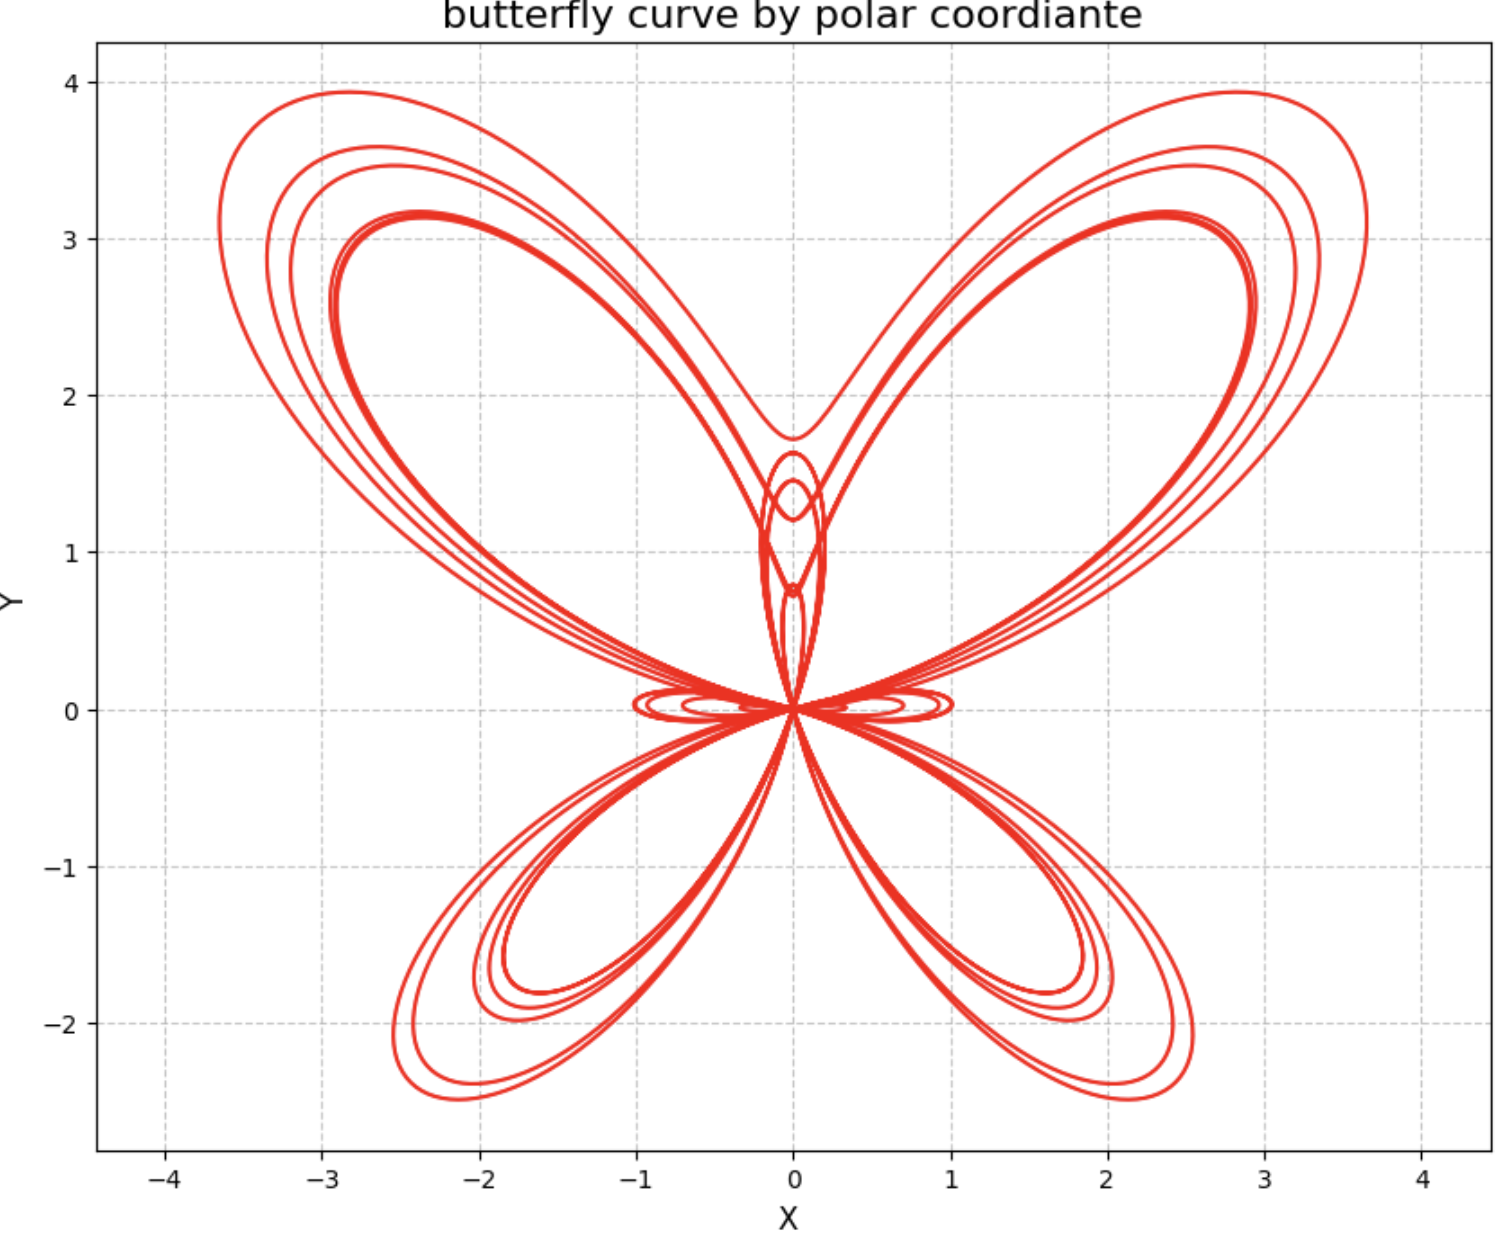

In [ ]:
!pip install numpy matplotlib pandas

In [ ]:
# 固定4行套件
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

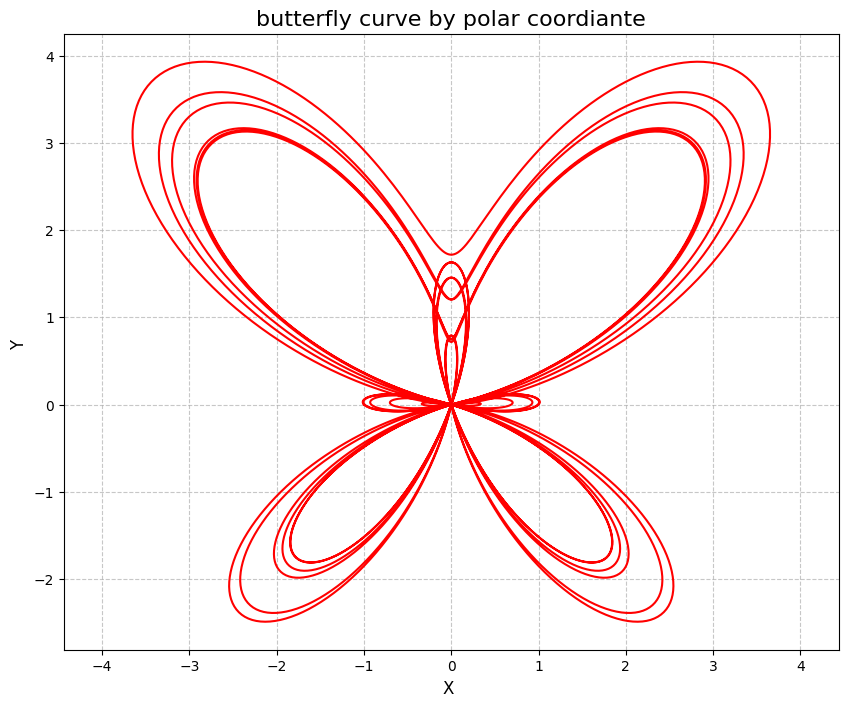

In [ ]:
# 設定圖表大小
plt.figure(figsize=(10, 8))

# 創建角度範圍，從0到12π
theta = np.linspace(0, 12*np.pi, 3000)  # 增加點數以獲得更平滑的曲線

# 蝴蝶曲線的極座標方程
# 這個公式會生成一個蝴蝶形狀
r = np.exp(np.sin(theta)) - 2*np.cos(4*theta) + np.sin((2*theta - np.pi)/24)**5

# 轉換為直角座標
x = r * np.cos(theta)
y = r * np.sin(theta)

# 繪製蝴蝶曲線
plt.plot(x, y, 'r-', linewidth=1.5)

# 設置標題和軸標籤
plt.title('butterfly curve by polar coordiante', fontsize=16)
plt.xlabel('X ', fontsize=12)
plt.ylabel('Y ', fontsize=12)

# 設置等比例座標軸
plt.axis('equal')

# 添加網格線
plt.grid(True, linestyle='--', alpha=0.7)

# 顯示圖像
plt.show()

## part 2: 未引入固定套件但捨不得刪

1. 本來想試著複製 [desmos 2024 art expo](https://www.desmos.com/art?lang=zh-TW)當中的作品，使用 matplotlib 畫出來
2. 但 Desmos 和 matplotlib 的表達方式不同，因此失敗
3. 因此進一步嘗試用 colab 做出 desmos desktop 使我得以在 colab 上繪製圖行
4. code ref: [iPython/Jupyter Notebook: How to Embed Interactive Graph Using Desmos API?](https://stackoverflow.com/questions/33860207/ipython-jupyter-notebook-how-to-embed-interactive-graph-using-desmos-api)

In [63]:
# 第一步：啟用第三方小工具支援
from google.colab import output
output.enable_custom_widget_manager()

In [64]:
# 第二步：install packages
!pip install jp_proxy_widget

In [65]:
# 第三步：執行Desmos計算器程式碼
# 設定 Desmos 計算器 API 的 URL
src = "https://www.desmos.com/api/v1.2/calculator.js?apiKey=dcb31709b452b1cf9dc26972add0fda6"

In [66]:
# 匯入必要的套件
import jp_proxy_widget
from IPython.display import display

In [67]:
# 建立 JSProxyWidget 實例
widget = jp_proxy_widget.JSProxyWidget()

# 載入 Desmos JavaScript 檔案
widget.load_js_files([src])


# 初始化 Desmos 計算器
# 使用極坐標方程式
widget.js_init("""
    // 設定畫布大小和風格
    element.width(700).height(500);

    // 初始化計算器
    element.calculator = Desmos.Calculator(element[0], {
      expressions: true,
      settingsMenu: true,
      zoomButtons: true,
      lockViewport: false,
      border: true,
      fontSize: 16
    });

    // 設定座標系
    element.calculator.setMathBounds({
      left: -10,
      right: 10,
      bottom: -8,
      top: 8
    });

    // 蝴蝶曲線 - 極坐標方程式
    element.calculator.setExpression({
      id: 'butterfly_polar',
      latex: 'r=e^{\\\\cos(\\\\theta)}-2\\\\cos(4\\\\theta)+(\\\\sin(\\\\frac{\\\\theta}{12}))^5',
      color: '#c74440'
    });

""")

# 顯示小工具
display(widget)

JSProxyWidget(status='deferring flush until render')